In [1]:
library(dplyr)

library(clusterProfiler)
library(ktplots)
library(fgsea)
library(msigdbr)





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Loading required package: ggplot2

Loading required package: Rcpp



In [2]:
setwd('/Users/matthewcoates/Documents/Cambridge/R files/COVID scRNAseq nasal biopsy + blood/')

In [3]:
degs <- as.list(list.files('DEGs/120721/AllCOVvHealthy/', full.names= TRUE, pattern ='.csv'))

In [4]:
names(degs) <- gsub('DEGs/120721/AllCOVvHealthy/B_Naive.csv', '', list.files('DEGs/120721/AllCOVvHealthy/',pattern ='.csv'))
names(degs) <- substr(names(degs), start = 1, stop = nchar(names(degs))-4)
names(degs)

[1] "B_follicular"         "B_mem_nonswitched"    "B_mem_switched"      
 [4] "B_Naive"              "Basophil"             "CD4_Act"             
 [7] "CD4_Tcm"              "CD4_Tem"              "CD4_Th17"            
[10] "CD4_Tn"               "CD4_Trm"              "CD8_CTL"             
[13] "CD8_Tn"               "CD8_Trm"              "DC_c141"             
[16] "DC_cCD1c"             "DC_follicular"        "DC_plasmacytoid"     
[19] "Endothelial_stromal"  "Epithelial_Basal"     "Epithelial_ciliated" 
[22] "Epithelial_Secretory" "Epithelial_Squamous"  "gdT_vd1"             
[25] "gdT_vd3"              "ILC"                  "Mac_nonres"          
[28] "Mac_res"              "Mast"                 "Megakaryocyte"       
[31] "Mono_classical"       "Mono_nonclassical"    "NK_adaptive"         
[34] "NK_CD16"              "NK_CD56"              "Plasma_IgM"          
[37] "Plasma"               "Tfh"                  "Treg"

In [5]:
degs <- lapply(degs, readr::read_csv)
degs <- degs[order(names(degs))]
degs

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_ad

Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names f

X1,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IFI44L,2.951726e-88,1.718055,0.285,0.014,7.578557e-84
IFITM1,4.476747e-85,1.339011,0.648,0.353,1.149405e-80
LY6E,9.493687e-65,1.202386,0.499,0.225,2.437504e-60
NR4A2,2.215143e-45,-1.530657,0.104,0.293,5.687380e-41
CD83,1.345099e-43,-1.115411,0.346,0.547,3.453543e-39
SLC2A3,3.109052e-31,-1.061544,0.238,0.411,7.982491e-27
EZR,2.311330e-29,-1.210546,0.354,0.524,5.934340e-25
X1,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [6]:
# GSEA of hallmark signatures

m_df = msigdbr(species = "Homo sapiens", category = "H")
m_df <- split(m_df, m_df$gs_name)
m_df <- lapply(m_df, function(x) x$gene_symbol)
ranklist <- lapply(degs, function(x) {
  y <- grepl('^RPS|^RPL|^MRPL|^MPRS|MT-|^HB|^IG', x$X1)
  x <- x[!y, ]
  gl <- x %>% dplyr::select(X1, avg_log2FC, p_val)
  gl$neglog10pval <- -log10(gl$p_val)
  rank <- unlist(gl$neglog10pval*sign(gl$avg_log2FC))
  rank[which(rank == -Inf)] <- -308
  rank[which(rank == Inf)] <- 308
  names(rank) <- gl$X1
  rank <- rev(sort(rank))
  return(rank)
})

In [7]:
hallmark_res <- lapply(ranklist, function(x) tryCatch(fgsea(pathways = m_df, stats = x, nperm=10000, minSize = 0, maxSize = 1000), error = function(e) {return(NULL)}))
hallmark_res <- lapply(hallmark_res, data.frame)

Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (6.49% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (10% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (71.98% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (45.1% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize =

In [8]:
hallmark_res

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_HYPOXIA,0.74417796,0.8372002,-0.6666667,-1.076837,4281,1,SLC2A3
HALLMARK_IL2_STAT5_SIGNALING,0.33094357,0.5956984,-0.8000000,-1.385629,1430,2,"CD83 , SLC2A3"
HALLMARK_INFLAMMATORY_RESPONSE,0.23861242,0.5368779,0.8000000,1.283146,1471,2,"IFITM1, LY6E"
HALLMARK_INTERFERON_ALPHA_RESPONSE,0.04635079,0.3683457,1.0000000,1.748427,314,3,"IFI44L, IFITM1, LY6E"
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.23861242,0.5368779,0.8000000,1.283146,1471,2,"IFI44L, LY6E"
HALLMARK_KRAS_SIGNALING_DN,0.46993030,0.7048954,0.6621798,1.062091,2898,2,IFI44L
HALLMARK_MITOTIC_SPINDLE,1.00000000,1.0000000,0.0000000,0.000000,5753,1,
HALLMARK_MTORC1_SIGNALING,0.74417796,0.8372002,-0.6666667,-1.076837,4281,1,SLC2A3
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.08185461,0.3683457,-1.0000000,-1.819823,285,3,"NR4A2 , CD83 , SLC2A3"


In [9]:
summary(hallmark_res)

                     Length Class      Mode
B_follicular         8      data.frame list
B_mem_nonswitched    8      data.frame list
B_mem_switched       8      data.frame list
B_Naive              8      data.frame list
Basophil             8      data.frame list
CD4_Act              8      data.frame list
CD4_Tcm              8      data.frame list
CD4_Tem              8      data.frame list
CD4_Th17             8      data.frame list
CD4_Tn               0      data.frame list
CD4_Trm              8      data.frame list
CD8_CTL              8      data.frame list
CD8_Tn               0      data.frame list
CD8_Trm              0      data.frame list
DC_c141              8      data.frame list
DC_cCD1c             8      data.frame list
DC_follicular        8      data.frame list
DC_plasmacytoid      8      data.frame list
Endothelial_stromal  8      data.frame list
Epithelial_Basal     8      data.frame list
Epithelial_ciliated  8      data.frame list
Epithelial_Secretory 8      data

In [10]:
hallmark_res[[1]]

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_HYPOXIA,0.74417796,0.8372002,-0.6666667,-1.076837,4281,1,SLC2A3
HALLMARK_IL2_STAT5_SIGNALING,0.33094357,0.5956984,-0.8000000,-1.385629,1430,2,"CD83 , SLC2A3"
HALLMARK_INFLAMMATORY_RESPONSE,0.23861242,0.5368779,0.8000000,1.283146,1471,2,"IFITM1, LY6E"
HALLMARK_INTERFERON_ALPHA_RESPONSE,0.04635079,0.3683457,1.0000000,1.748427,314,3,"IFI44L, IFITM1, LY6E"
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.23861242,0.5368779,0.8000000,1.283146,1471,2,"IFI44L, LY6E"
HALLMARK_KRAS_SIGNALING_DN,0.46993030,0.7048954,0.6621798,1.062091,2898,2,IFI44L
HALLMARK_MITOTIC_SPINDLE,1.00000000,1.0000000,0.0000000,0.000000,5753,1,
HALLMARK_MTORC1_SIGNALING,0.74417796,0.8372002,-0.6666667,-1.076837,4281,1,SLC2A3
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.08185461,0.3683457,-1.0000000,-1.819823,285,3,"NR4A2 , CD83 , SLC2A3"


In [11]:
plot_GSEA <- function(gsea,
                       filename,
                      h = 3, w = 5) {
  require(ggplot2)
  gsea$pathway <- gsub("HALLMARK_", "", gsea$pathway)
  gsea$pathway <- gsub("_", " ", gsea$pathway)
  gsea$pathway <- tools::toTitleCase(tolower(gsea$pathway))
  gsea$pathway <- factor(gsea$pathway, levels = unique(gsea$pathway))
  gsea$NES[which(is.na(gsea$NES))] <- 0
  gsea$pval[which(gsea$pval == 0)] <- 0.001
  gsea$pval[which(gsea$pval == 1)] <- 0.99999
  gsea$padj[which(gsea$padj == 0)] <- 0.001
  gsea$padj[which(gsea$padj == 1)] <- 0.99999
  gsea <- gsea[-which(gsea$pval >= 0.05), ]
  gsea$ranking <- -log10(gsea$pval)*sign(gsea$NES)
  gsea <- gsea[order(gsea$ranking), ]
  x_lim_min <- abs(ceiling(min(-log10(gsea$pval))))
  x_lim_max <- abs(ceiling(max(-log10(gsea$pval))))
  if(x_lim_min > x_lim_max){
    xval1 <- x_lim_min * -1
    xval2 <- x_lim_min
  } else {
    xval1 <- x_lim_max * -1
    xval2 <- x_lim_max
  }
  g <- ggplot(gsea, aes(x = ranking, y = reorder(pathway, ranking), col = padj, size = abs(NES))) +
    geom_point(alpha = 0.8) +
    scale_color_gradientn(
      colours = c(
        # rev(colorRampPalette(RColorBrewer::brewer.pal(9, 'YlGnBu'))(125)),
        viridis::viridis(125, direction = -1),
        rep("#E7E7E7", 375)), limits = c(0:1)) +
    labs(x = expression(paste("Signed", " -log" ["10"], "pval")), y = "Hallmarks") +
    scale_y_discrete(labels = gsea$pathway) +
    theme_bw() +
    geom_vline(xintercept = 0, linetype="dashed", alpha = 0.5) +
    geom_vline(xintercept = -log10(0.25), linetype="dashed", col = '#F28E2B', alpha = 0.5) +
    geom_vline(xintercept = -log10(0.25)*-1, linetype="dashed", col = '#F28E2B', alpha = 0.5) +
    theme(
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      axis.line = element_line(colour = "black")) +
    # annotate("rect", xmin=-Inf, xmax=0, ymin=0, ymax=Inf, alpha = 0.1) +
    xlim(xval1, xval2) +
    scale_radius(range = c(3,7)) +
    coord_cartesian(clip = 'off') + small_guide() + small_legend(keysize=.5) +
    ggtitle(names(ranklist)[i])
  return(g)
   ggsave(file = filename, plot = g, device = 'pdf', useDingbats = FALSE, h = h, w = w)
}



In [12]:
names(ranklist)

[1] "B_follicular"         "B_mem_nonswitched"    "B_mem_switched"      
 [4] "B_Naive"              "Basophil"             "CD4_Act"             
 [7] "CD4_Tcm"              "CD4_Tem"              "CD4_Th17"            
[10] "CD4_Tn"               "CD4_Trm"              "CD8_CTL"             
[13] "CD8_Tn"               "CD8_Trm"              "DC_c141"             
[16] "DC_cCD1c"             "DC_follicular"        "DC_plasmacytoid"     
[19] "Endothelial_stromal"  "Epithelial_Basal"     "Epithelial_ciliated" 
[22] "Epithelial_Secretory" "Epithelial_Squamous"  "gdT_vd1"             
[25] "gdT_vd3"              "ILC"                  "Mac_nonres"          
[28] "Mac_res"              "Mast"                 "Megakaryocyte"       
[31] "Mono_classical"       "Mono_nonclassical"    "NK_adaptive"         
[34] "NK_CD16"              "NK_CD56"              "Plasma"              
[37] "Plasma_IgM"           "Tfh"                  "Treg"

In [13]:
names(ranklist[1])

[1] "B_follicular"

In [14]:
hallmark_res

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_HYPOXIA,0.74417796,0.8372002,-0.6666667,-1.076837,4281,1,SLC2A3
HALLMARK_IL2_STAT5_SIGNALING,0.33094357,0.5956984,-0.8000000,-1.385629,1430,2,"CD83 , SLC2A3"
HALLMARK_INFLAMMATORY_RESPONSE,0.23861242,0.5368779,0.8000000,1.283146,1471,2,"IFITM1, LY6E"
HALLMARK_INTERFERON_ALPHA_RESPONSE,0.04635079,0.3683457,1.0000000,1.748427,314,3,"IFI44L, IFITM1, LY6E"
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.23861242,0.5368779,0.8000000,1.283146,1471,2,"IFI44L, LY6E"
HALLMARK_KRAS_SIGNALING_DN,0.46993030,0.7048954,0.6621798,1.062091,2898,2,IFI44L
HALLMARK_MITOTIC_SPINDLE,1.00000000,1.0000000,0.0000000,0.000000,5753,1,
HALLMARK_MTORC1_SIGNALING,0.74417796,0.8372002,-0.6666667,-1.076837,4281,1,SLC2A3
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.08185461,0.3683457,-1.0000000,-1.819823,285,3,"NR4A2 , CD83 , SLC2A3"


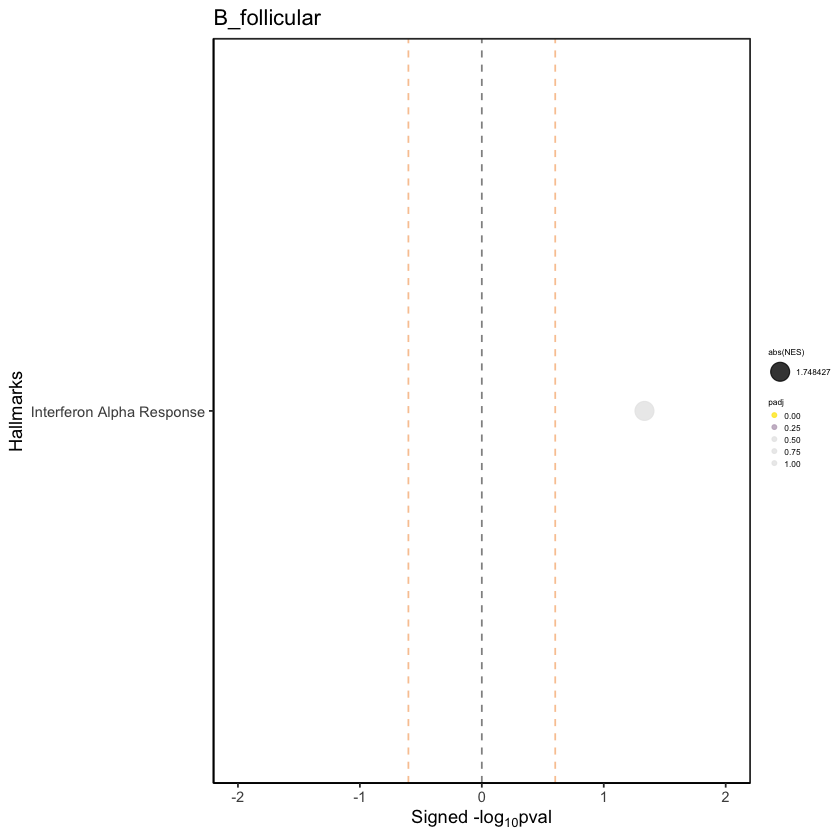

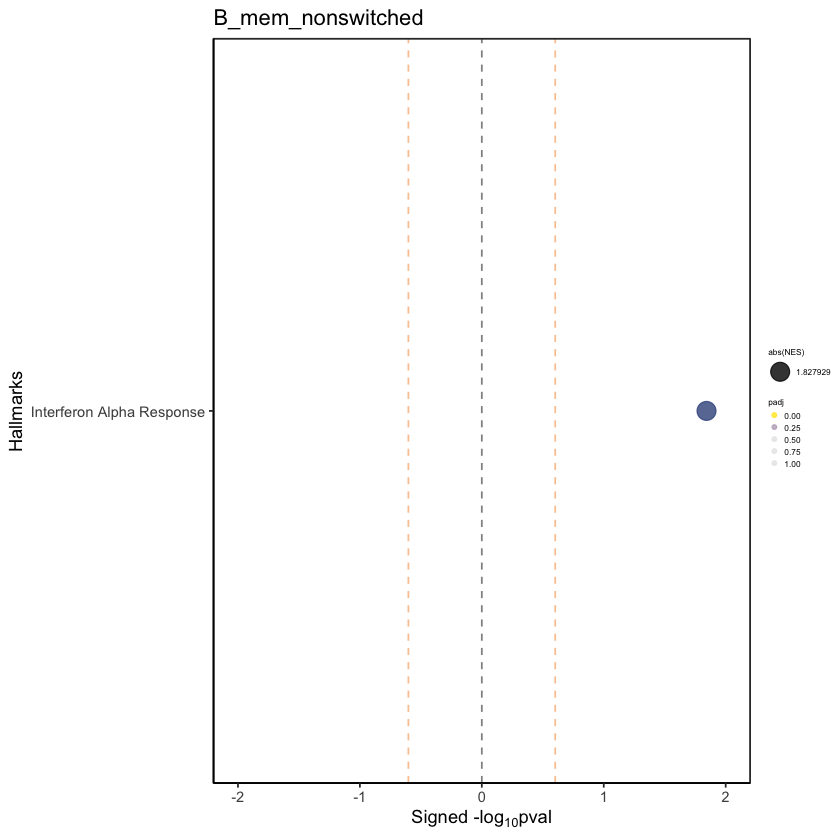

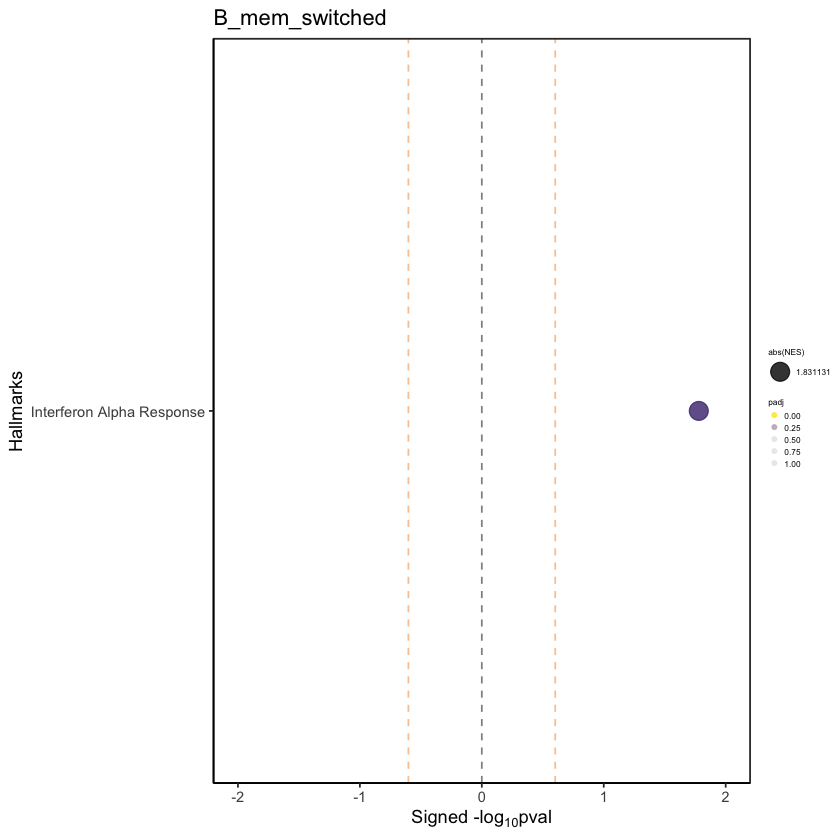

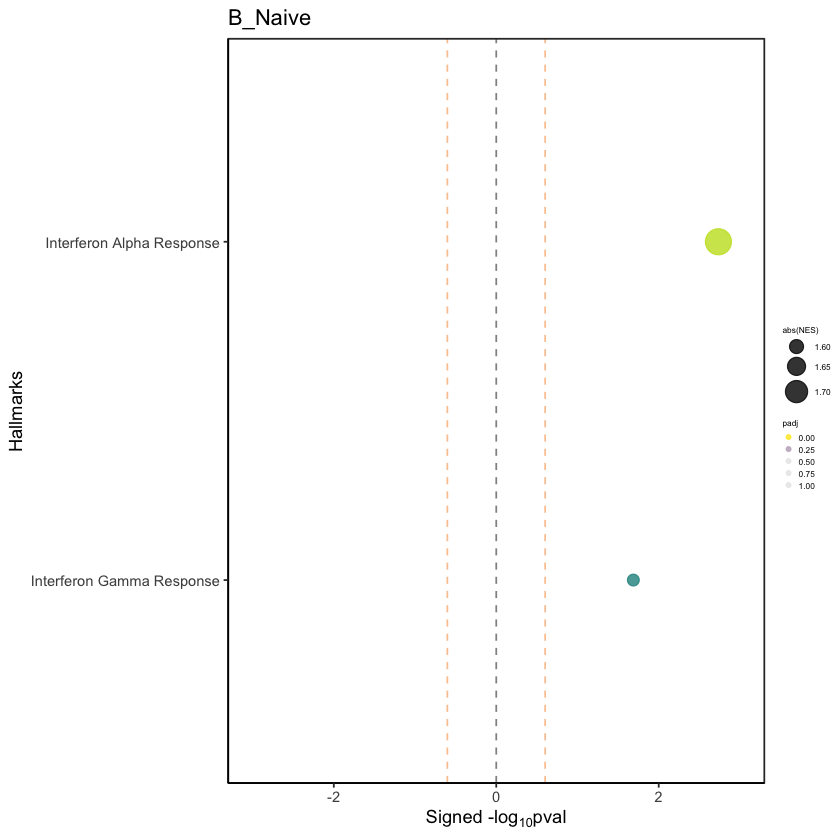

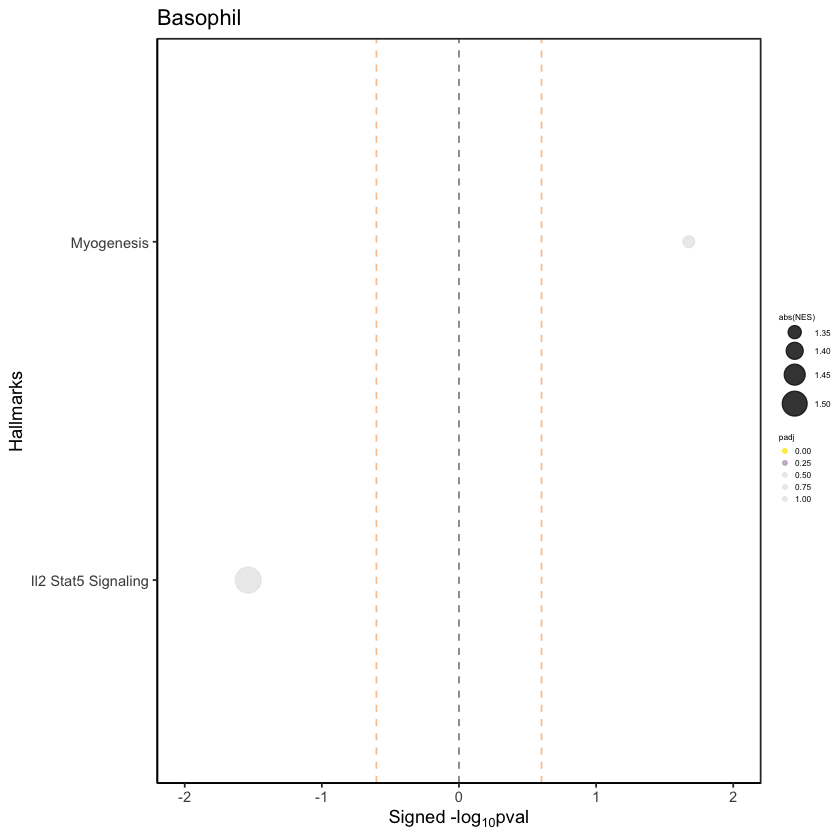

Warning message in min(-log10(gsea$pval)):
“no non-missing arguments to min; returning Inf”
Warning message in max(-log10(gsea$pval)):
“no non-missing arguments to max; returning -Inf”


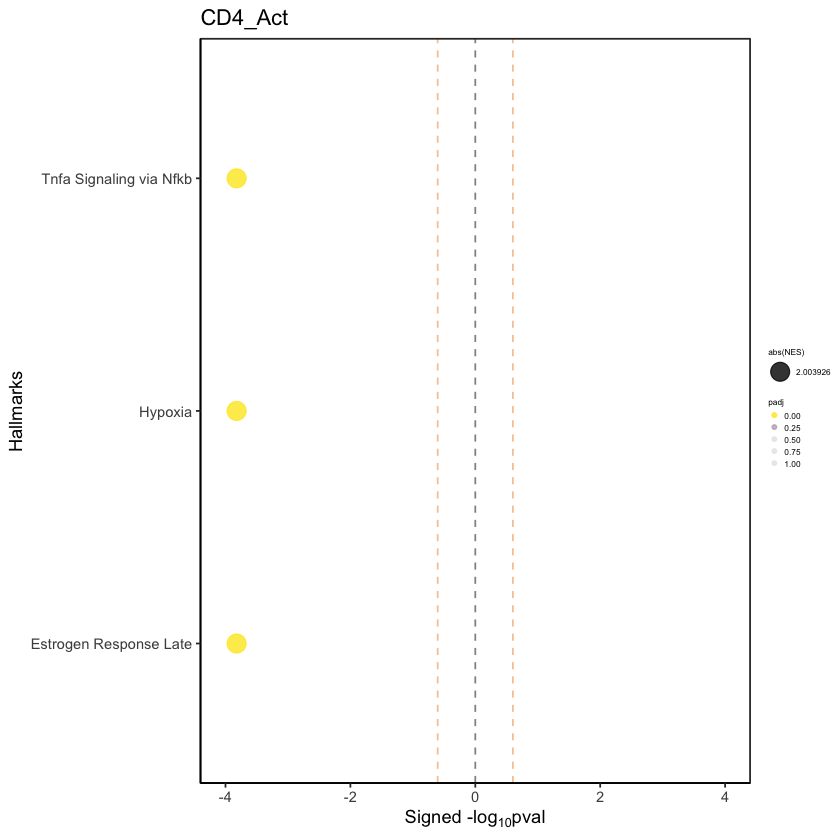

Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”


ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


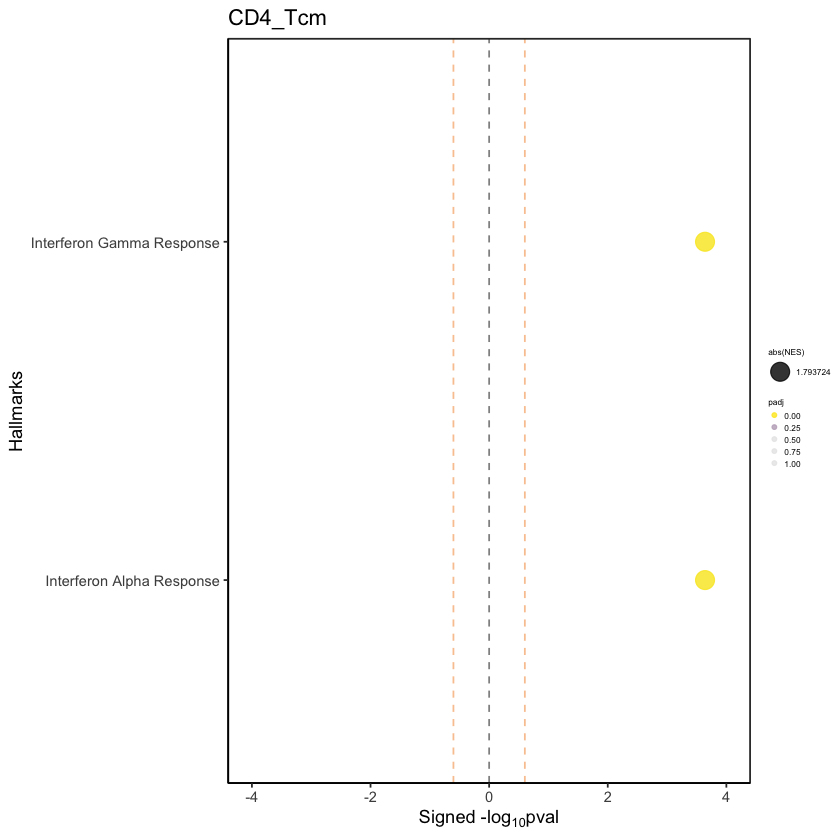

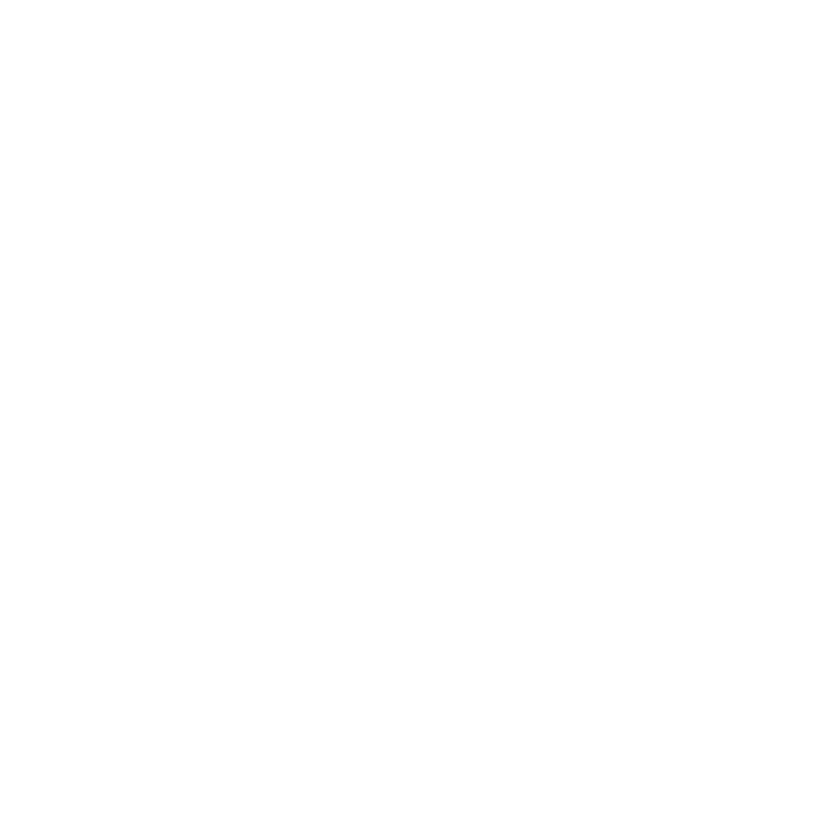

In [15]:
for (i in 1:length(ranklist)){
  plot <- tryCatch(expr = hallmark_res)
  plot <- plot_GSEA(hallmark_res[[i]])
    print(plot)
}

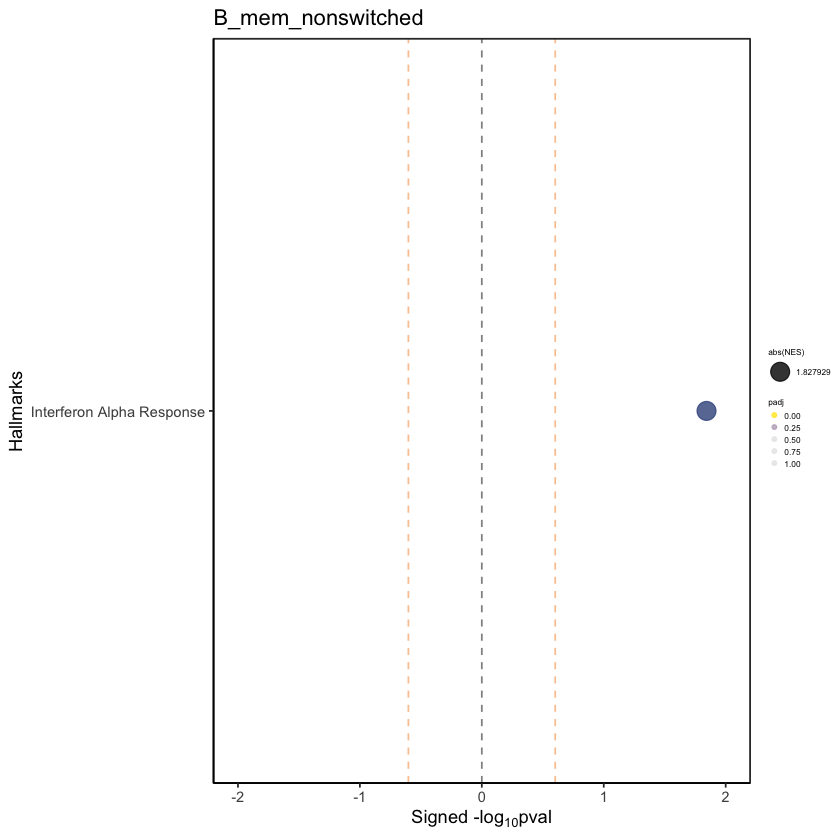

In [21]:
plot_GSEA(hallmark_res[[2]]) + ggtitle(names(ranklist[2]))

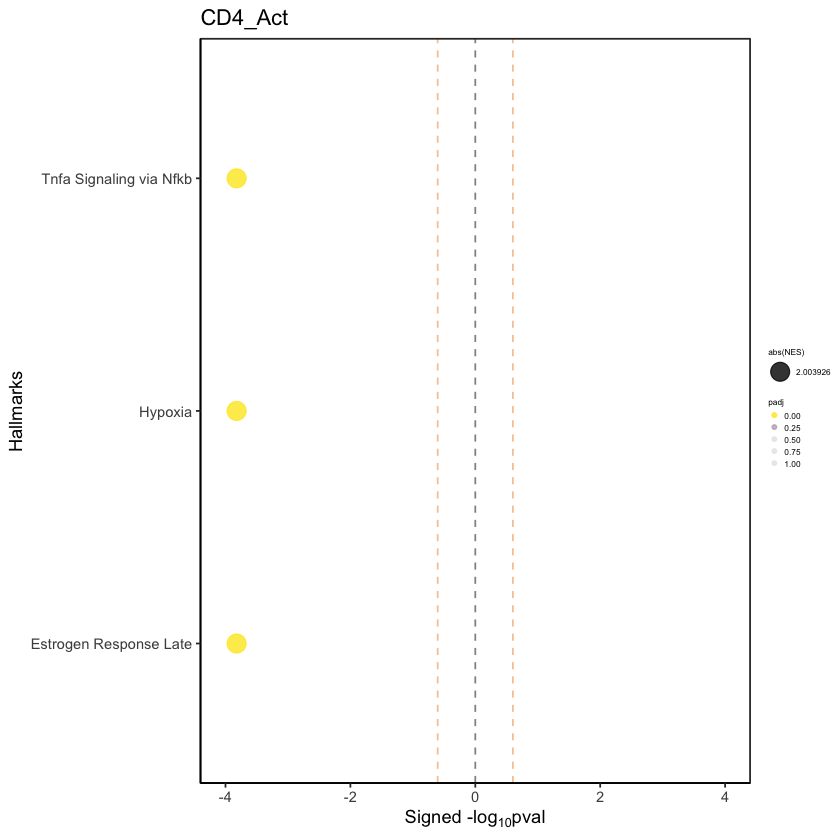

In [22]:
plot_GSEA(hallmark_res[[6]]) + ggtitle(names(ranklist[6]))

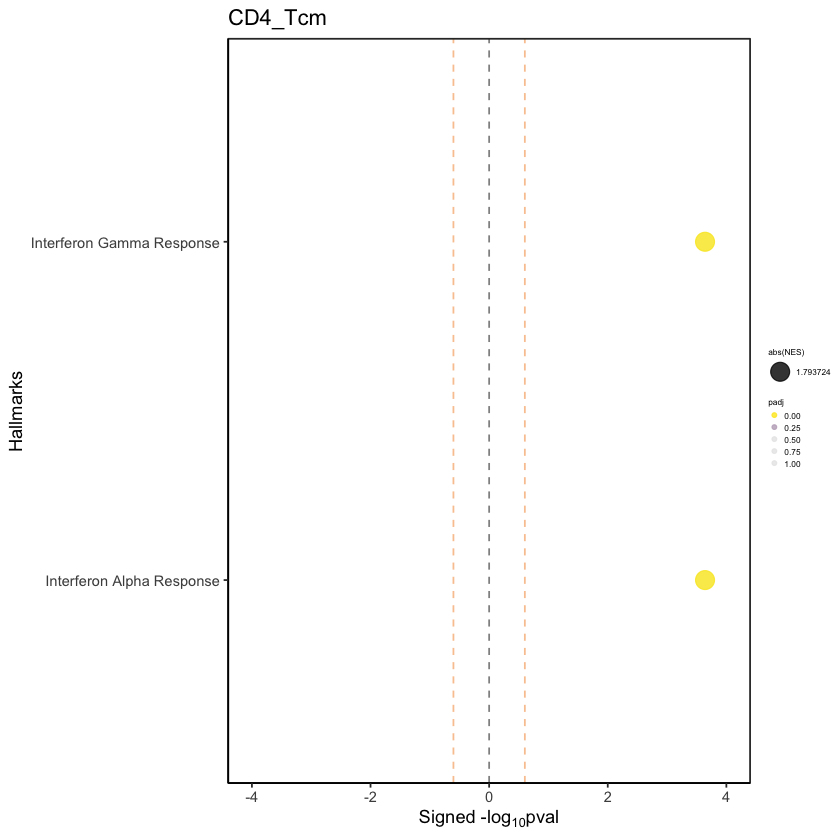

In [23]:
plot_GSEA(hallmark_res[[7]]) + ggtitle(names(ranklist[7]))

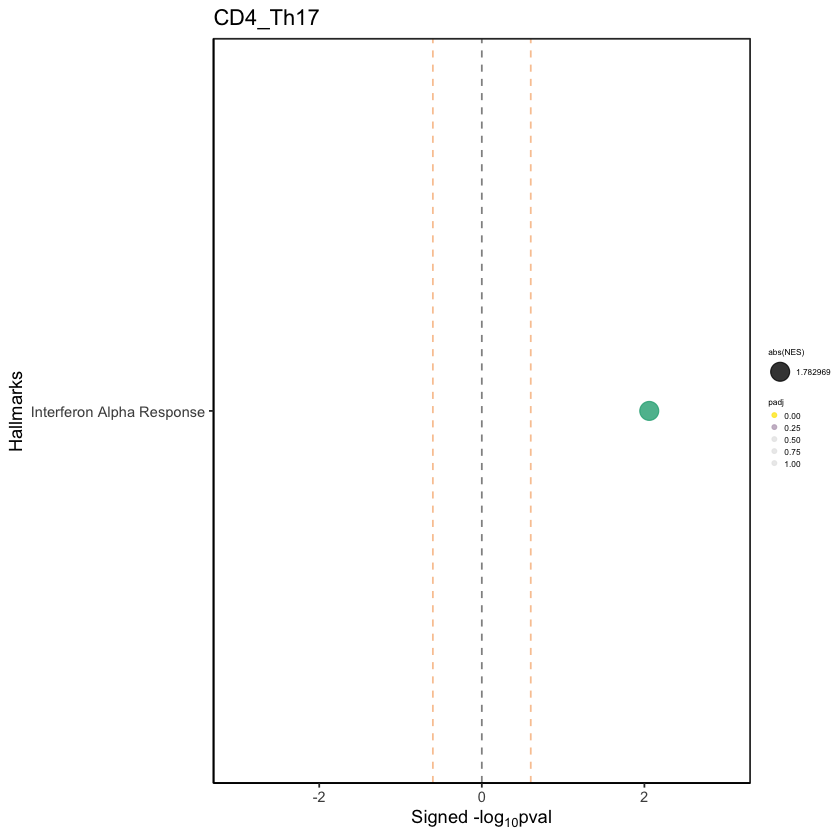

In [25]:
plot_GSEA(hallmark_res[[9]]) + ggtitle(names(ranklist[9]))

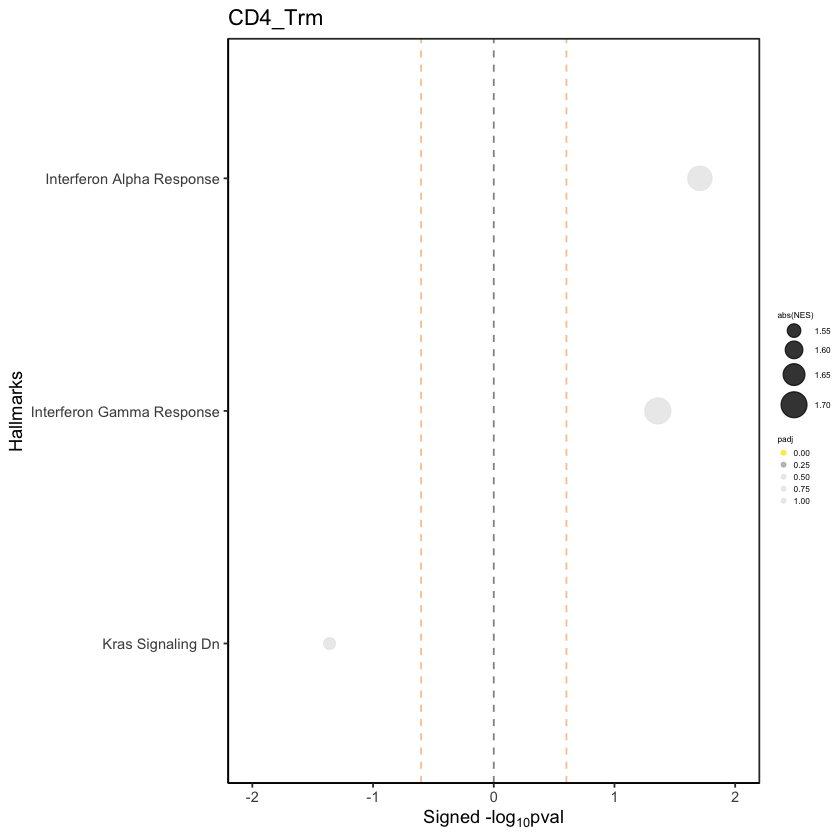

In [27]:
plot_GSEA(hallmark_res[[11]]) + ggtitle(names(ranklist[11]))

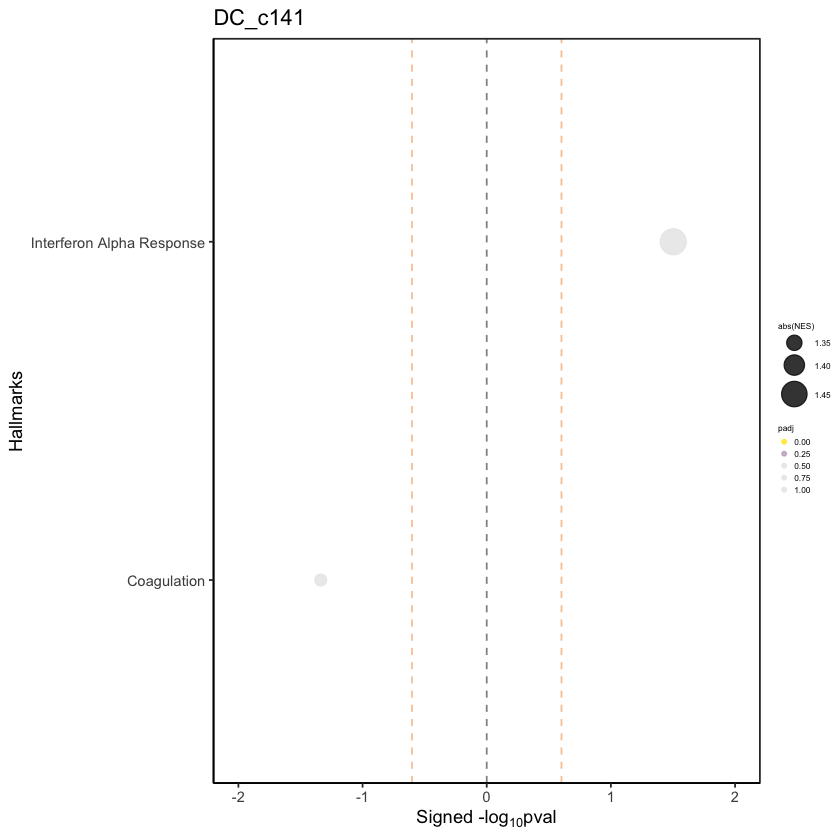

In [31]:
plot_GSEA(hallmark_res[[15]]) + ggtitle(names(ranklist[15]))

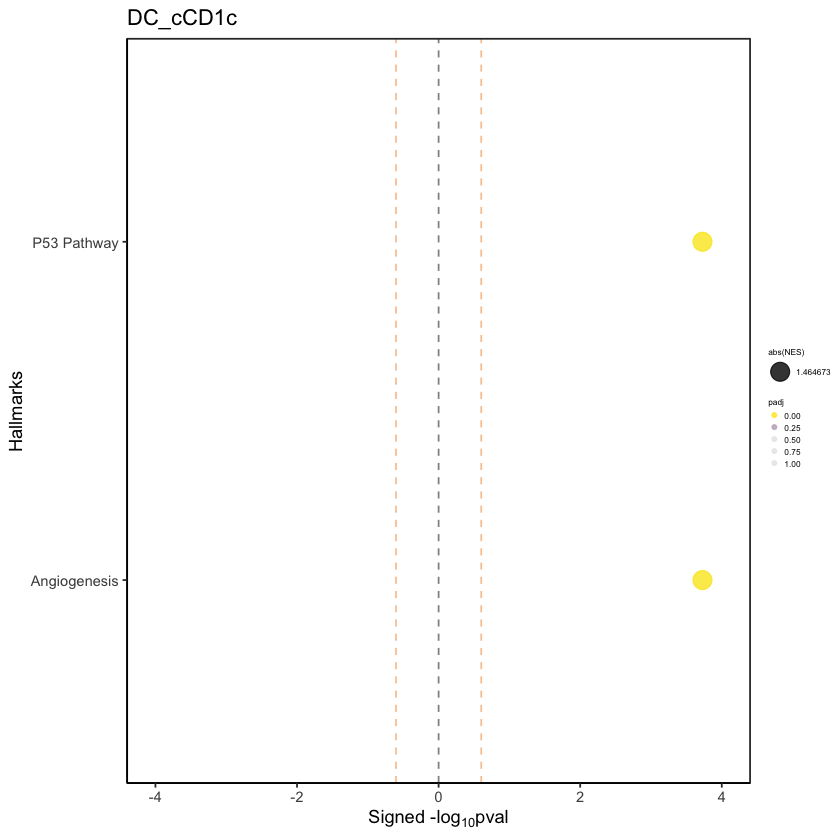

In [32]:
plot_GSEA(hallmark_res[[16]]) + ggtitle(names(ranklist[16]))

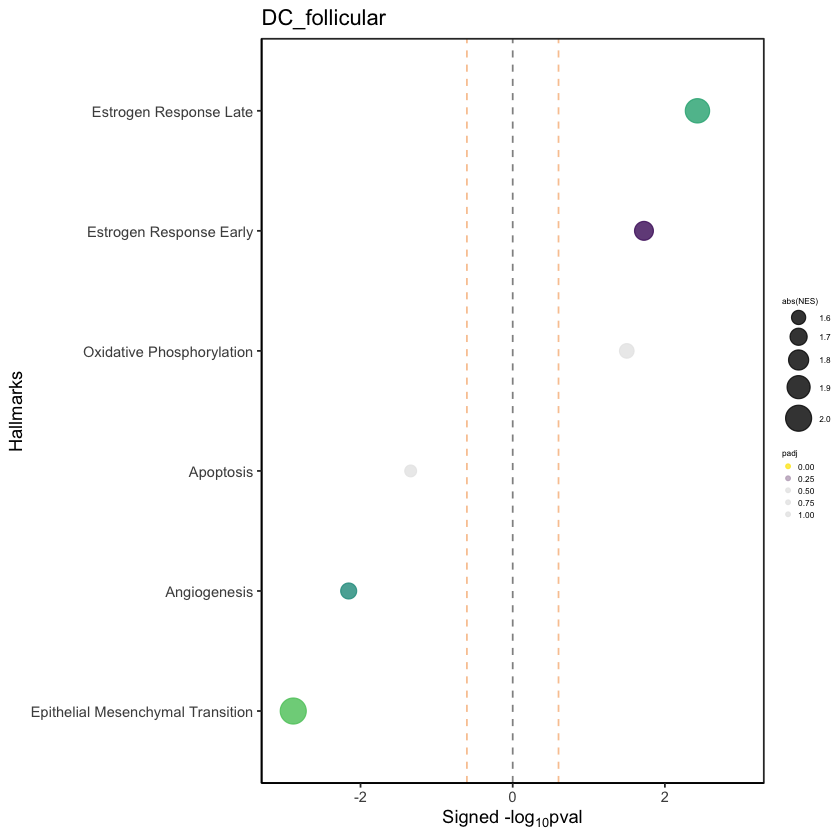

In [33]:
plot_GSEA(hallmark_res[[17]]) + ggtitle(names(ranklist[17]))

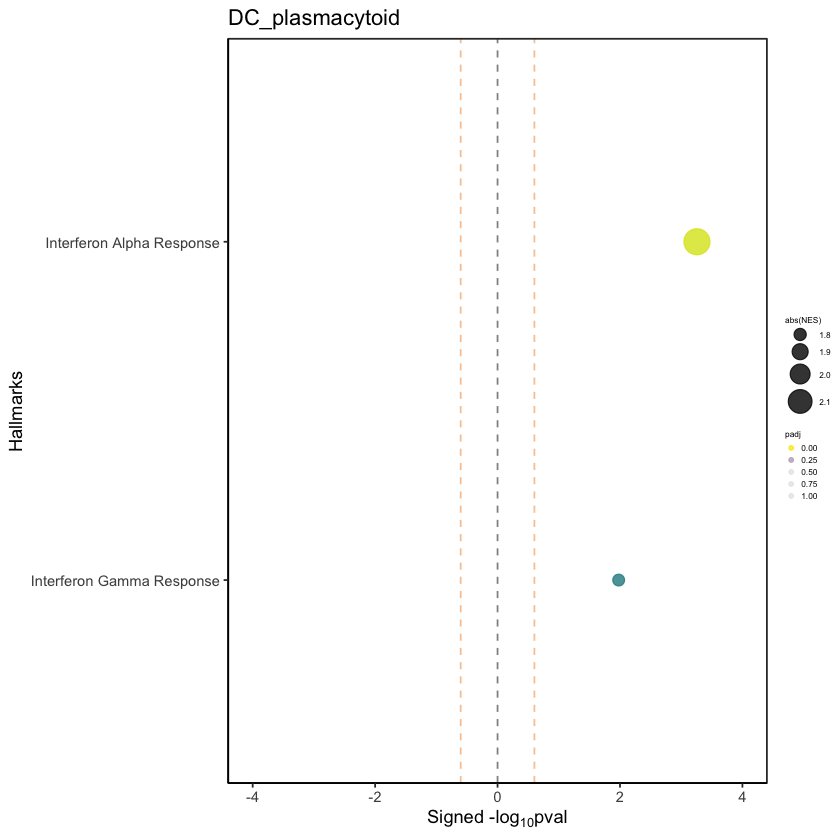

In [34]:
plot_GSEA(hallmark_res[[18]]) + ggtitle(names(ranklist[18]))

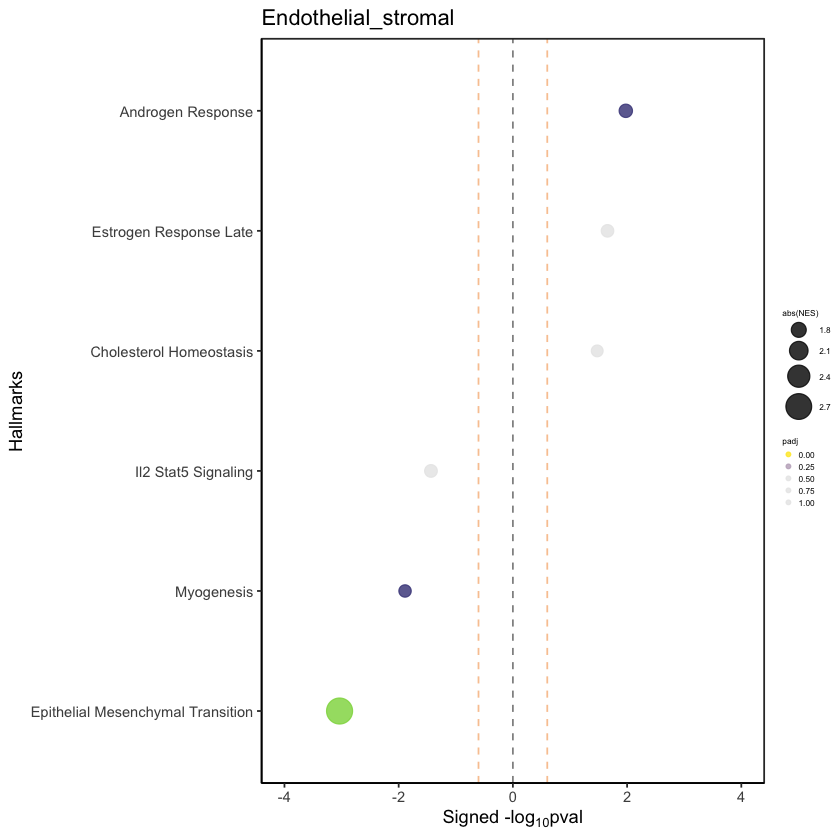

In [35]:
plot_GSEA(hallmark_res[[19]]) + ggtitle(names(ranklist[19]))

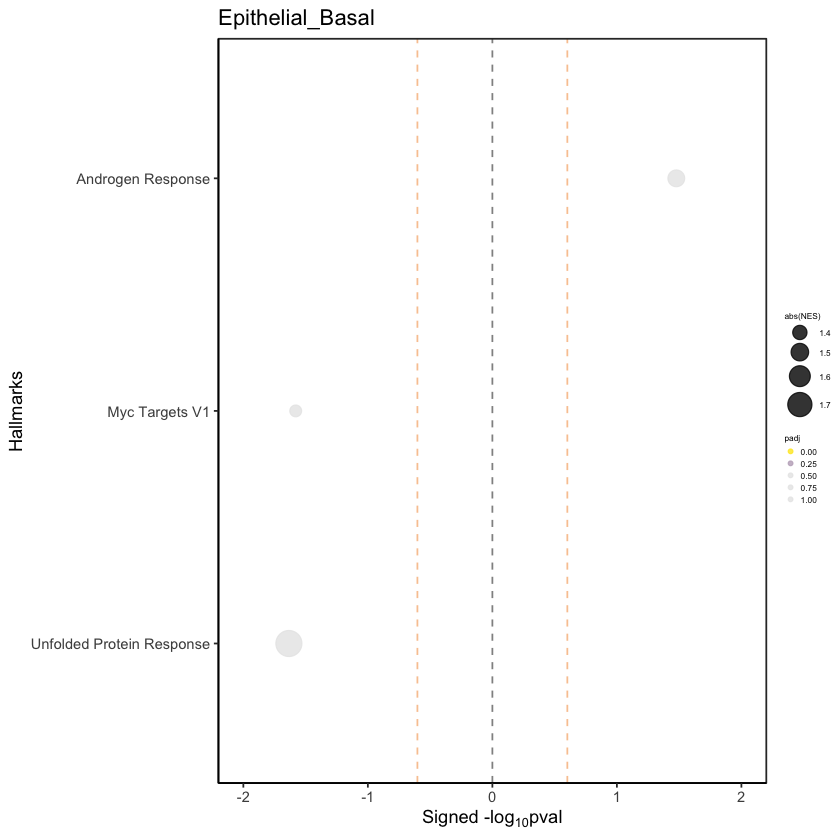

In [36]:
plot_GSEA(hallmark_res[[20]]) + ggtitle(names(ranklist[20]))

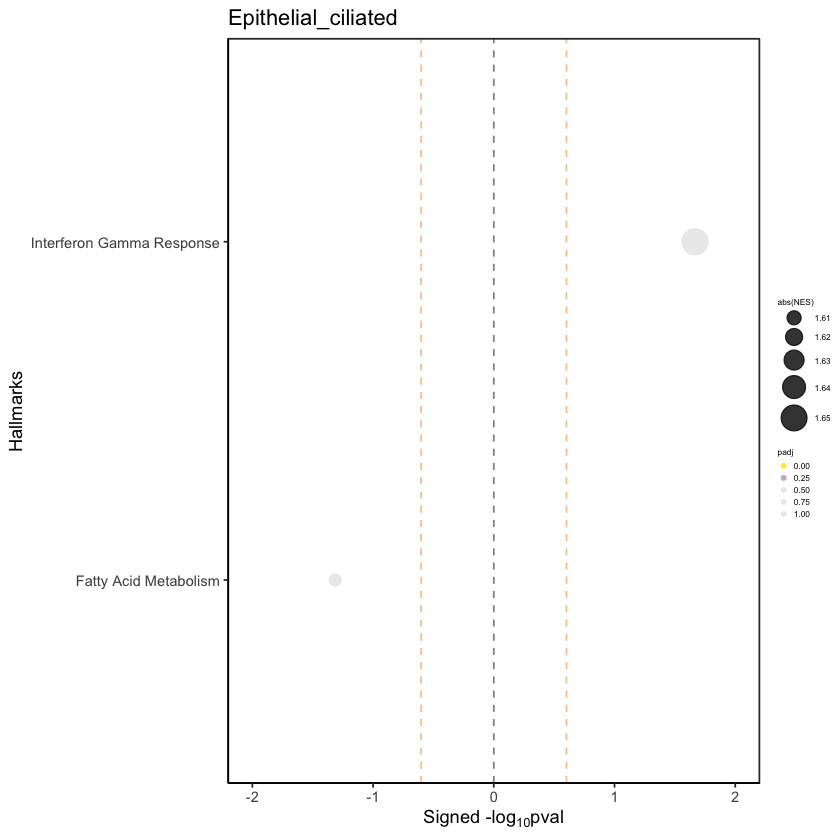

In [37]:
plot_GSEA(hallmark_res[[21]]) + ggtitle(names(ranklist[21]))

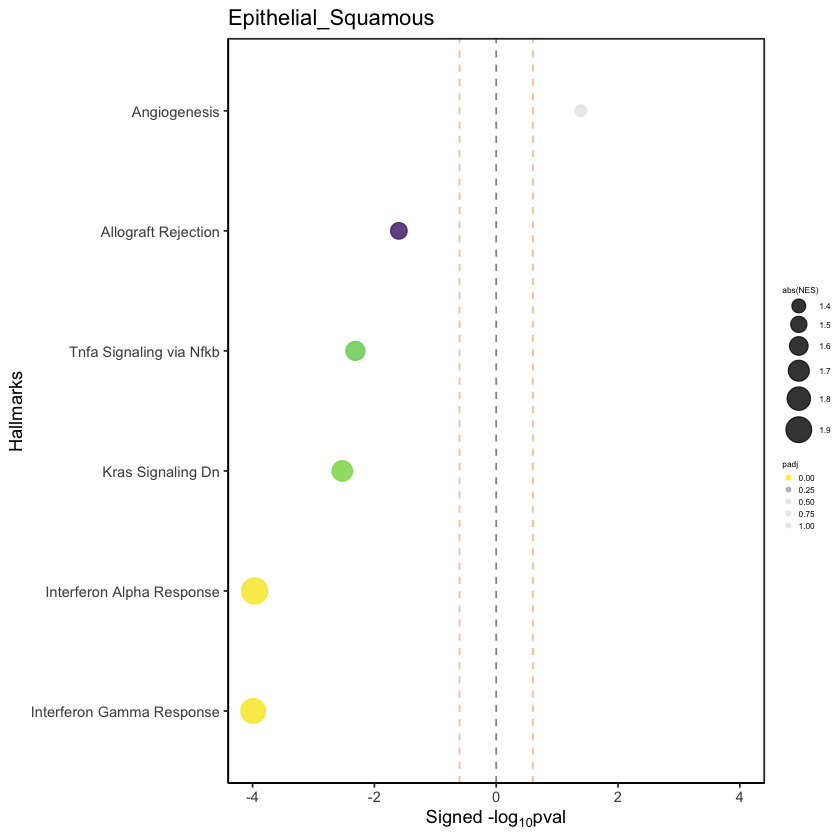

In [39]:
plot_GSEA(hallmark_res[[23]]) + ggtitle(names(ranklist[23]))

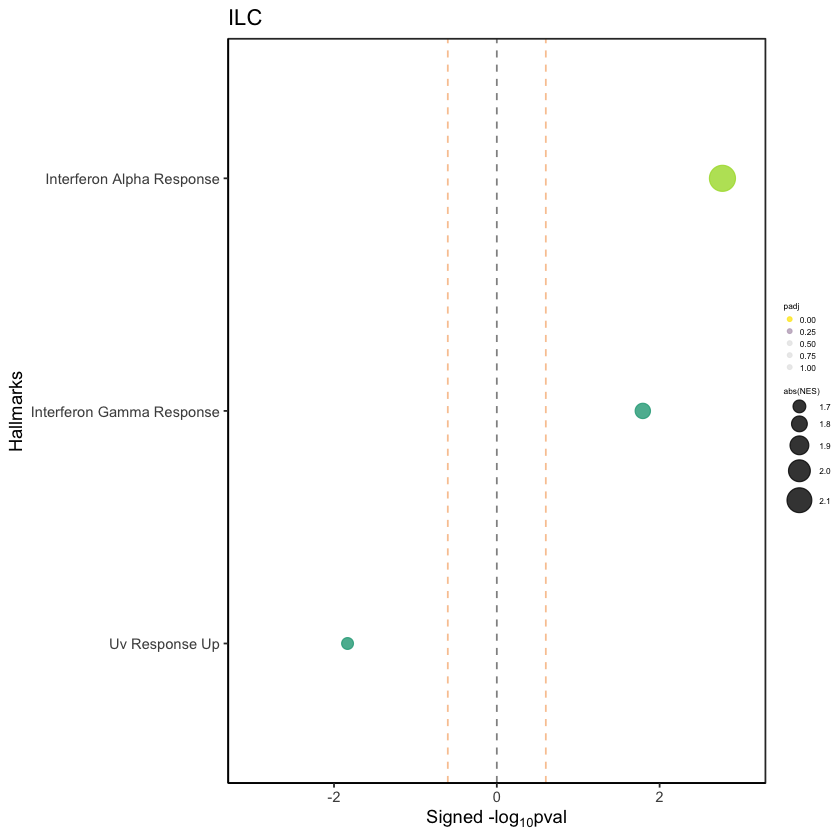

In [42]:
plot_GSEA(hallmark_res[[26]]) + ggtitle(names(ranklist[26]))

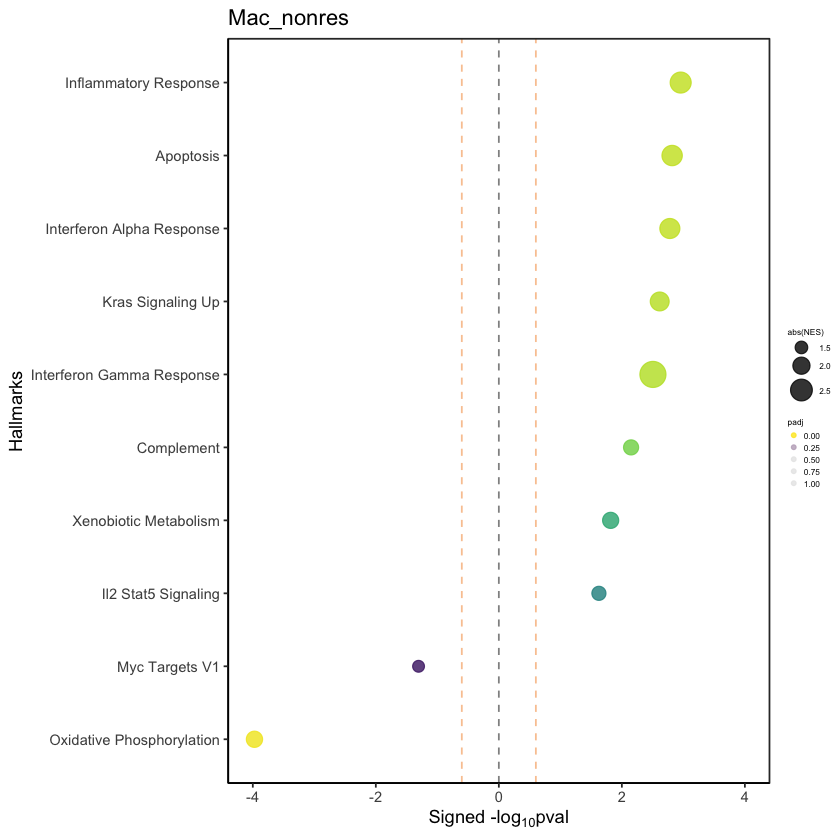

In [43]:
plot_GSEA(hallmark_res[[27]]) + ggtitle(names(ranklist[27]))

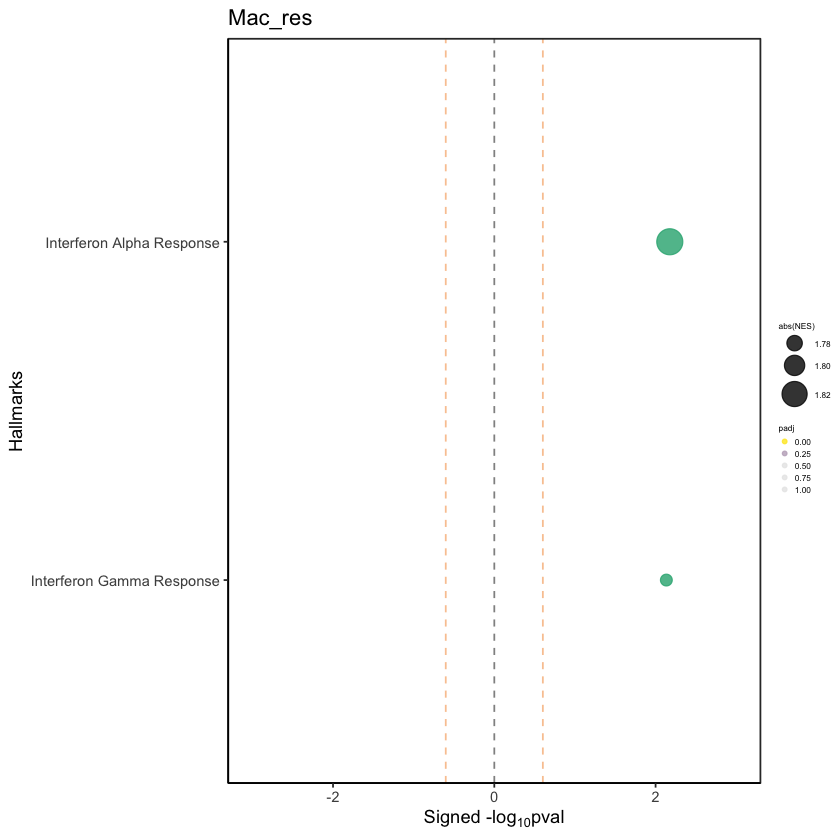

In [44]:
plot_GSEA(hallmark_res[[28]]) + ggtitle(names(ranklist[28]))

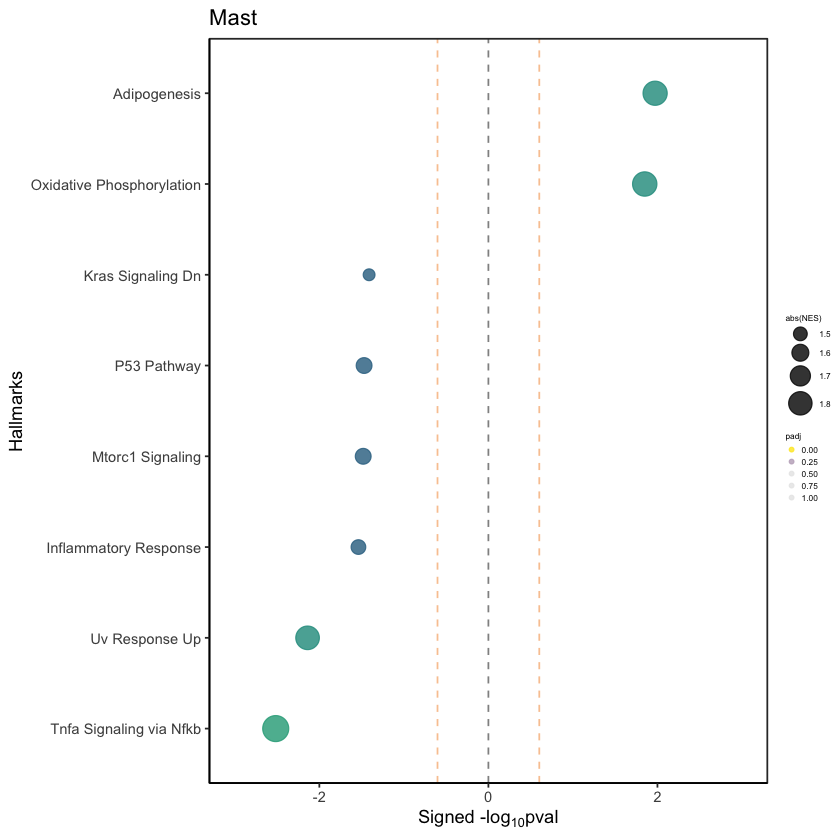

In [45]:
plot_GSEA(hallmark_res[[29]]) + ggtitle(names(ranklist[29]))

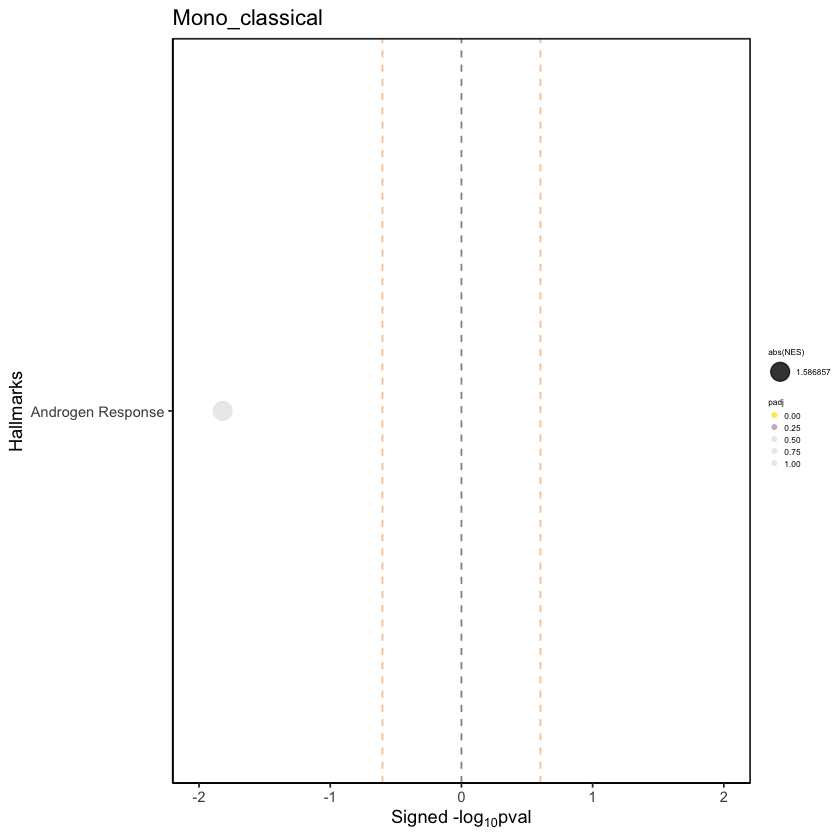

In [47]:
plot_GSEA(hallmark_res[[31]]) + ggtitle(names(ranklist[31]))

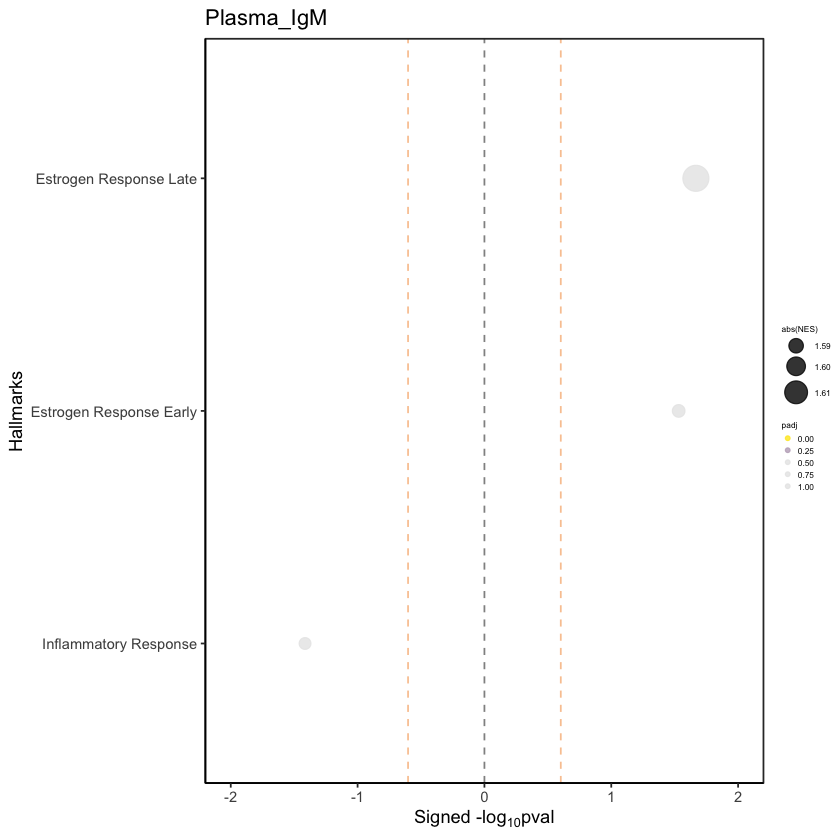

In [53]:
plot_GSEA(hallmark_res[[37]]) + ggtitle(names(ranklist[37]))

In [72]:
for (i in 1:length(ranklist)){
  hallmark_res[[i]]$label = names(ranklist)[i]
}
combined_res = do.call(rbind, hallmark_res)
row.names(combined_res) <- NULL
combined_res$leadingEdge <- do.call(c, lapply(combined_res$leadingEdge, paste, collapse = "|"))
write.csv(data.frame(combined_res), file = 'figures/dotplot/mnp_gsea_hallmark.csv')

In [73]:
?pdf